In [ ]:
%tensorflow_version 2.x

In [ ]:
!nvidia-smi

Fri Dec 18 00:19:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip3 install -U albumentations

     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 36.7MB 87kB/s 
     |████████████████████████████████| 952kB 59.2MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!rm -rf sample_data

In [ ]:
!git config --global user.email "omerf.sarioglu@gmail.com"
!git config --global user.name "omerferhatt"

In [ ]:
!git clone https://github.com/omerferhatt/defect-detection.git

Cloning into 'defect-detection'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 98 (delta 36), reused 91 (delta 29), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [ ]:
!git stash

Saved working directory and index state WIP on master: a4c9bb5 Code update - Load model added


In [ ]:
!git pull

Updating a4c9bb5..8f8cd11
Fast-forward
 inference.py | 31 +++++++++++++++++++++++++++++++
 main.py      | 42 ++++++++++++++++++++++++++----------------
 2 files changed, 57 insertions(+), 16 deletions(-)


In [ ]:
%cd defect-detection

In [ ]:
!gdown --id 1z64ioVqjb__VKN3w9YmPyu7Cfxn50qN8 -O data/raw.zip

Downloading...
From: https://drive.google.com/uc?id=1z64ioVqjb__VKN3w9YmPyu7Cfxn50qN8
To: /content/defect-detection/data/raw.zip
697MB [00:11, 62.6MB/s]


In [ ]:
!unzip --qq data/raw.zip -d data/
!rm -rf data/raw.zip

# Training with CLI

In [ ]:
%load_ext tensorboard

In [ ]:
%cd defect-detection

/content/defect-detection


In [ ]:
!python3 main.py --save-checkpoint --epoch 50

2020-12-18 00:56:40.134187: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2020-12-18 00:56:42.580505: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-18 00:56:42.581454: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-18 00:56:42.620042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-18 00:56:42.620623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-18 00:56:42.620680: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
%tensorboard --logdir logs

In [45]:
!python3 main.py --inference --load-model logs/00_56_12_18/checkpoint.ckpt --test-image data/test_data/class3_def_2.png --save-result

2020-12-18 01:45:10.895519: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2020-12-18 01:45:13.320945: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-18 01:45:13.321815: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-18 01:45:13.326135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-18 01:45:13.326771: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-18 01:45:13.326813: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
!tar -cvzf logs.tar.gz logs

In [54]:
!mv logs.tar.gz /content/drive/MyDrive/logs.tar.gz

# Training on notebook

In [ ]:
!python3 data/csv_preprocess.py

In [ ]:
import tensorflow as tf

from data.dataset import get_ds_pipeline, visualize_images
from models.defect_model import DefectLocalizeModel
from utils.losses import NonZeroMSELoss, NonZeroL2Loss

In [ ]:
defect_cls = DefectLocalizeModel(backbone=tf.keras.applications.DenseNet169)

In [ ]:
defect_cls.model.load_weights('logs/00_56_12_18/checkpoint.ckpt')

In [ ]:
train_ds, test_ds = get_ds_pipeline(batch_size=128)

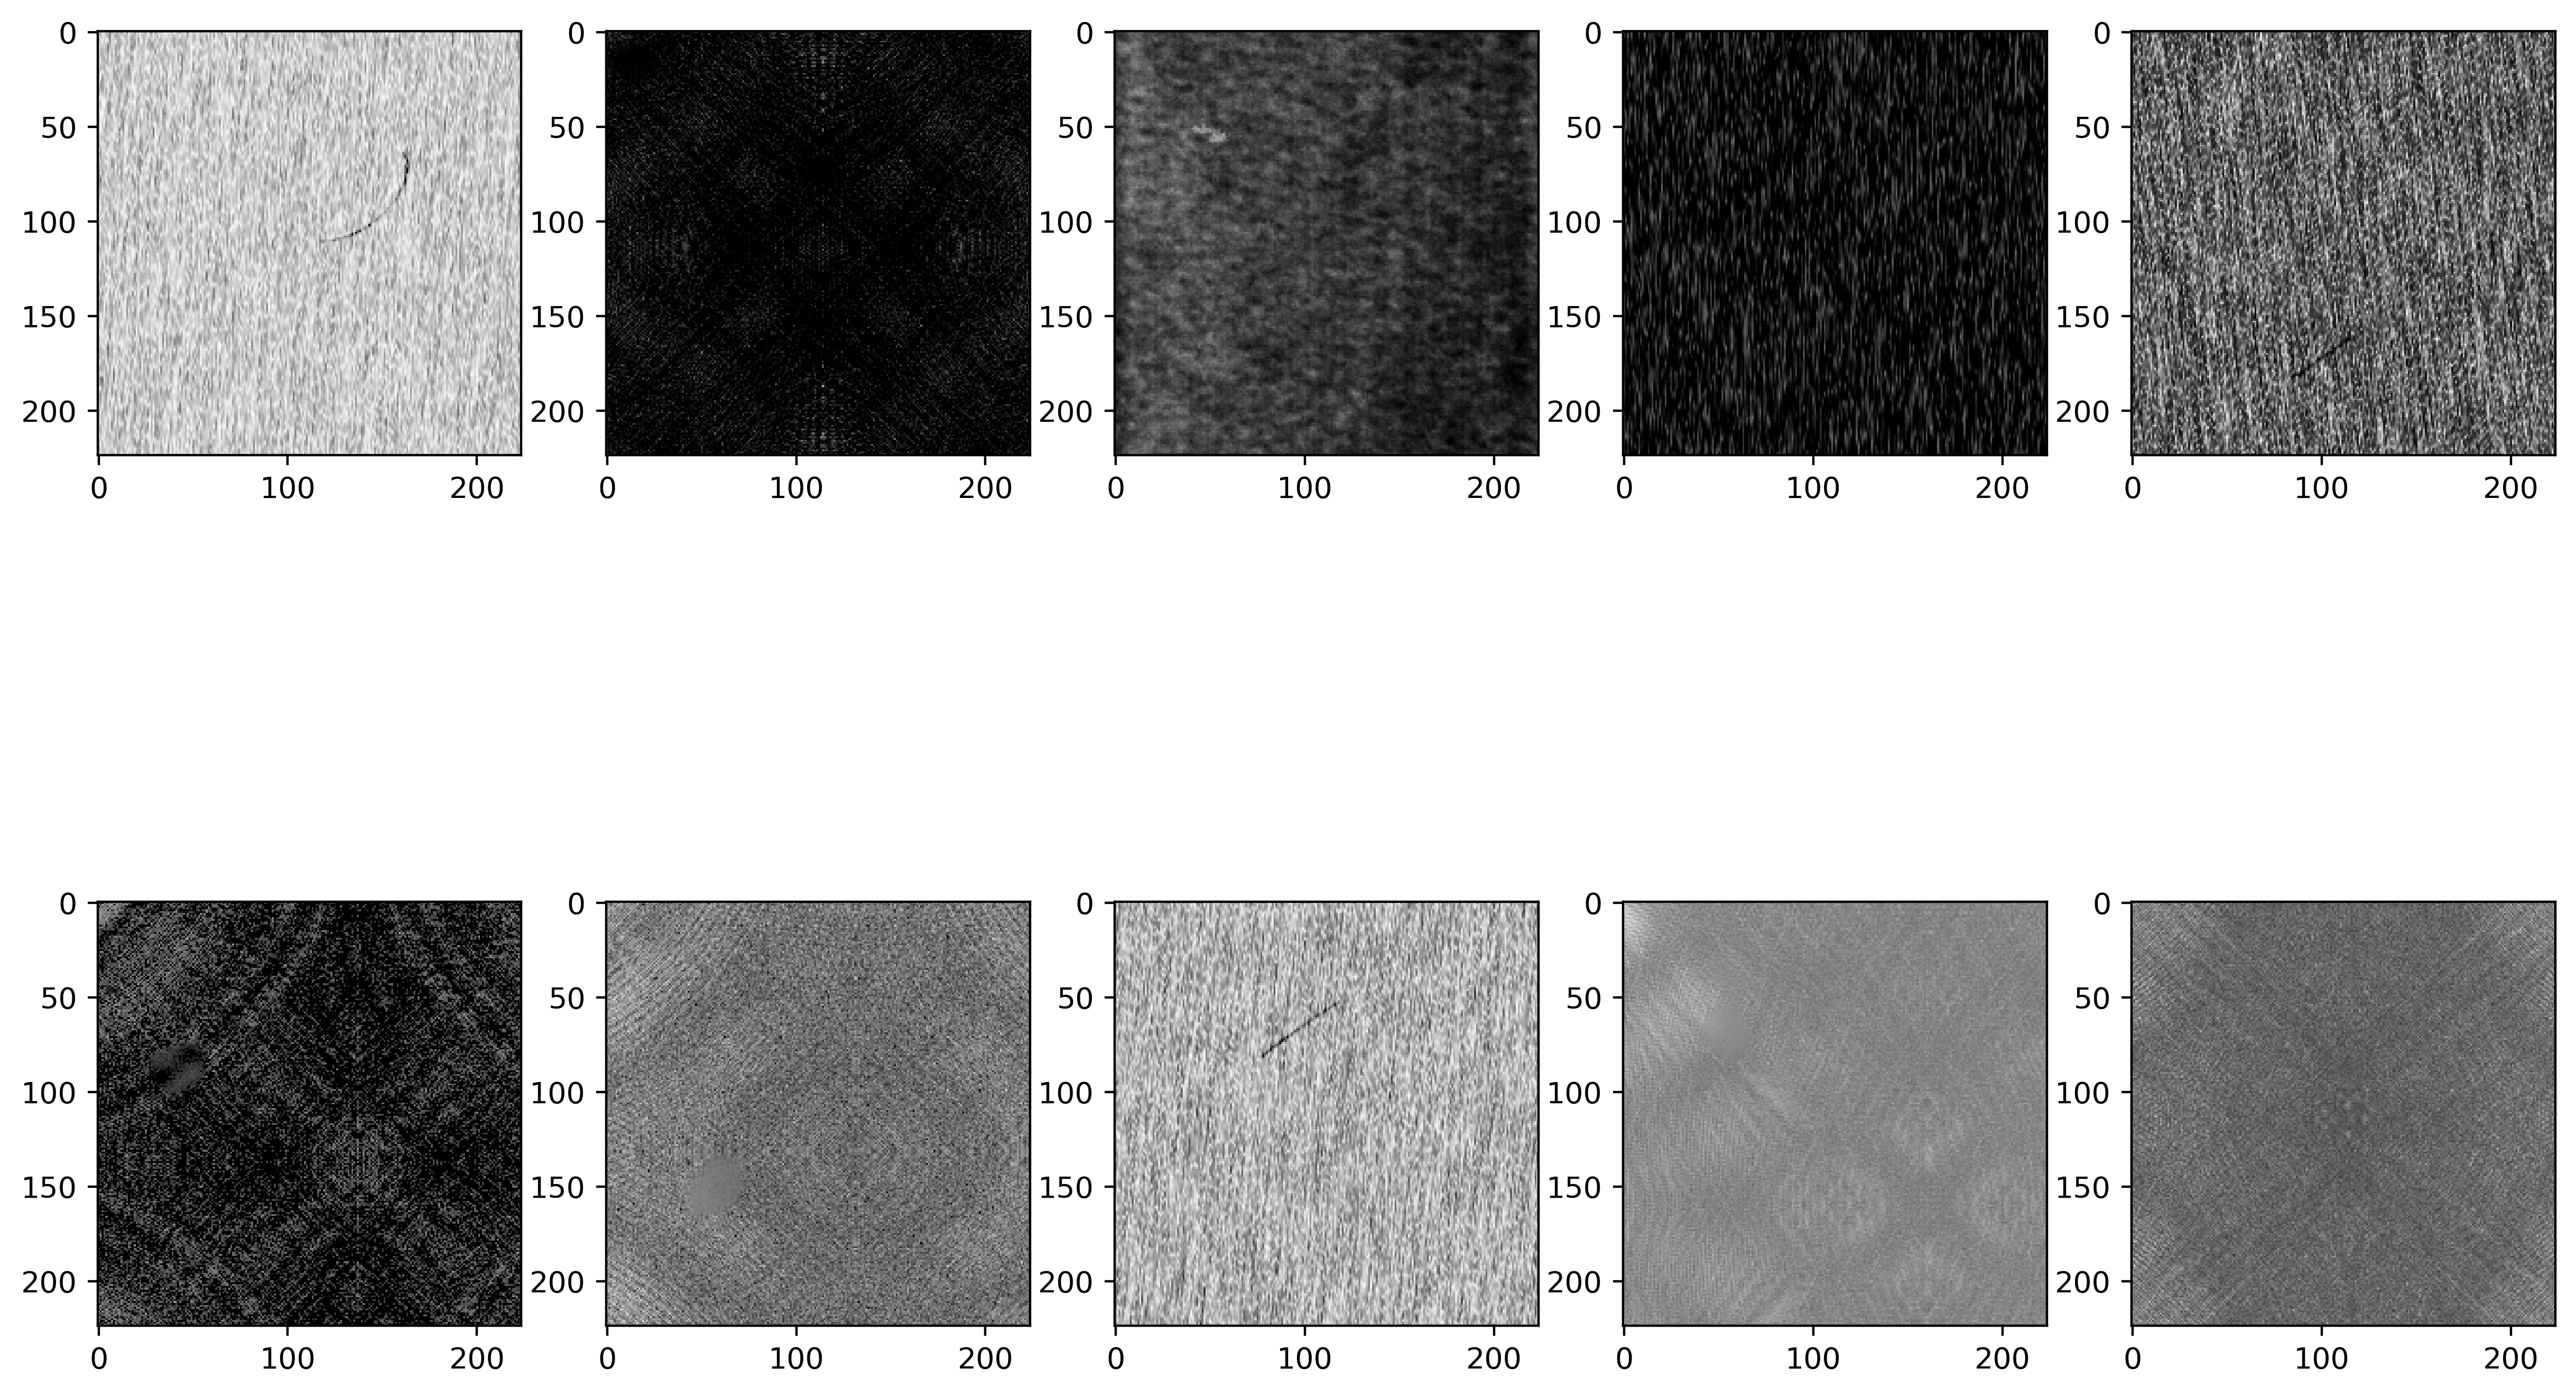

In [ ]:
img_list = []
for x, y in train_ds.unbatch().batch(1).take(10).as_numpy_iterator():
    img_list.append(x[0])

visualize_images(img_list)

In [ ]:
defect_cls = DefectLocalizeModel(backbone=tf.keras.applications.ResNet50V2)

In [ ]:
defect_cls.model.summary()

In [ ]:
defect_cls.model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, decay=1e-7, momentum=0.92, nesterov=True),
    loss={
        'is_def': tf.keras.losses.BinaryCrossentropy(),
        'cls': tf.keras.losses.CategoricalCrossentropy(),
        'bbox_param': NonZeroMSELoss(),
        'bbox_center': NonZeroL2Loss()},
    metrics={
        'is_def': tf.keras.metrics.BinaryAccuracy(),
        'cls': tf.keras.metrics.CategoricalAccuracy()},
    run_eagerly=True
)

defect_cls.model.fit(train_ds, epochs=100, validation_data=test_ds, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10),
                                                                               tf.keras.callbacks.ReduceLROnPlateau(patience=4, factor=0.5, verbose=1)])

Epoch 1/100
6/6 [==============================] - 7s 1s/step - loss: 1.8907 - is_def_loss: 0.7747 - cls_loss: 0.8731 - bbox_param_loss: 0.1392 - bbox_center_loss: 0.1037 - is_def_binary_accuracy: 0.5306 - cls_categorical_accuracy: 0.6056 - val_loss: 1.0907 - val_is_def_loss: 0.7464 - val_cls_loss: 0.1311 - val_bbox_param_loss: 0.0971 - val_bbox_center_loss: 0.1161 - val_is_def_binary_accuracy: 0.5222 - val_cls_categorical_accuracy: 0.9889
Epoch 2/100
6/6 [==============================] - 5s 841ms/step - loss: 1.1601 - is_def_loss: 0.7434 - cls_loss: 0.2626 - bbox_param_loss: 0.1022 - bbox_center_loss: 0.0519 - is_def_binary_accuracy: 0.5528 - cls_categorical_accuracy: 0.9125 - val_loss: 0.9335 - val_is_def_loss: 0.7299 - val_cls_loss: 0.0251 - val_bbox_param_loss: 0.0874 - val_bbox_center_loss: 0.0911 - val_is_def_binary_accuracy: 0.5167 - val_cls_categorical_accuracy: 0.9944
Epoch 3/100
6/6 [==============================] - 5s 845ms/step - loss: 0.9803 - is_def_loss: 0.7500 - cls_l

Is defected: 	GT vs Prediction | 1.0 - 0.9997809529304504
Class type:  	GT vs Prediction | 1 - 2
Bbox center: 	GT vs Prediction | [0.35546875 0.5371094 ] - [0.57729113 0.609421  ]
Bbox params: 	GT vs Prediction | [0.29875    0.04171875 0.44747886] - [0.0793044  0.01575203 0.51568717]
Bbox center  	L2 Distance      | 0.027217071503400803


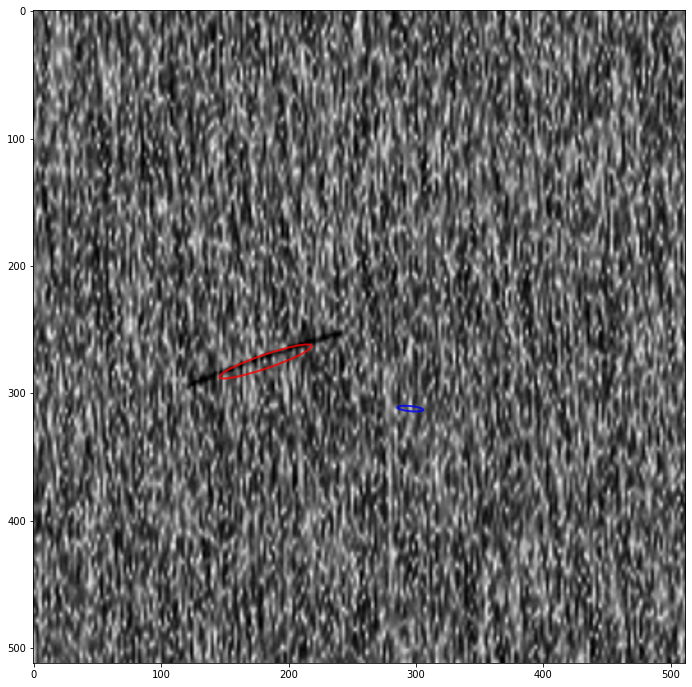

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Ellipse


select_im = 23

for idx, (x, y) in enumerate(test_ds.unbatch().take(select_im).as_numpy_iterator()):
    if idx == select_im-1:
        img = x
        class_type = y[1]
        is_defect = y[0]
        bbox_param = y[2]
        bbox_center = y[3] 
        img_arr = np.array(img)[np.newaxis, :, :, :]
        y_pred = defect_cls.model.predict(img_arr)
        img_arr = (img_arr*255).astype(np.uint8)
        class_type_pred = y_pred[2]
        is_defect_pred = y_pred[0]
        bbox_param_pred = np.squeeze(y_pred[2])
        bbox_center_pred = np.squeeze(y_pred[3])
        img_arr = Image.fromarray(img_arr[0])
        img_arr = img_arr.resize((512, 512))
        print(f'Is defected: \tGT vs Prediction | {is_defect} - {is_defect_pred.squeeze()}')
        print(f'Class type:  \tGT vs Prediction | {np.argmax(class_type)} - {np.argmax(class_type_pred.squeeze())}')
        print(f'Bbox center: \tGT vs Prediction | {bbox_center} - {bbox_center_pred}')
        print(f'Bbox params: \tGT vs Prediction | {bbox_param} - {bbox_param_pred}')
        print(f'Bbox center  \tL2 Distance      | {np.mean((bbox_center - bbox_center_pred)**2)}')
        # Plot configuration
        fig, ax = plt.subplots(figsize=(12, 12))
        plt.imshow(img_arr, cmap='gray')
        # Creating un-filled ellipse on image
        if is_defect > 0.5:
            e = Ellipse(xy=(bbox_center_pred*512), width=bbox_param_pred[0]*256, height=bbox_param_pred[1]*256,
                        angle=((bbox_param_pred[2] * 2 * np.pi - np.pi) * 180 / np.pi), edgecolor='b', lw=2, facecolor='none')
            e.set_alpha(0.8)
            ax.add_artist(e)    
            e_org = Ellipse(xy=(bbox_center*512), width=bbox_param[0]*256, height=bbox_param[1]*256,
                        angle=((bbox_param[2] * 2 * np.pi - np.pi) * 180 / np.pi), edgecolor='r', lw=2, facecolor='none')
            e_org.set_alpha(0.8)        
            ax.add_artist(e_org)
        plt.show()


In [ ]:
model.save('/content/drive/MyDrive/model_defect/', include_optimizer=True)

In [ ]:
%cd

/root


In [ ]:
!tar -czvf name-of-archive.tar.gz /content/defect-detection/

tar: You may not specify more than one '-Acdtrux', '--delete' or  '--test-label' option
Try 'tar --help' or 'tar --usage' for more information.


In [ ]:
!tar --help

Usage: tar [OPTION...] [FILE]...
GNU 'tar' saves many files together into a single tape or disk archive, and can
restore individual files from the archive.

Examples:
  tar -cf archive.tar foo bar  # Create archive.tar from files foo and bar.
  tar -tvf archive.tar         # List all files in archive.tar verbosely.
  tar -xf archive.tar          # Extract all files from archive.tar.

 Local file name selection:

      --add-file=FILE        add given FILE to the archive (useful if its name
                             starts with a dash)
  -C, --directory=DIR        change to directory DIR
      --exclude=PATTERN      exclude files, given as a PATTERN
      --exclude-backups      exclude backup and lock files
      --exclude-caches       exclude contents of directories containing
                             CACHEDIR.TAG, except for the tag file itself
      --exclude-caches-all   exclude directories containing CACHEDIR.TAG
      --exclude-caches-under exclude everything under director